# 1.3 Linear Regression

### 1.3.1 Fit a simple linear regression model using gradient descent to predict quality using only chlorides.

In [4]:
import numpy as np
from sklearn.linear_model import SGDRegressor
from sklearn.preprocessing import StandardScaler
import pandas as pd
df = pd.read_csv("/Users/theodorsjetnanutvik/Desktop/MaskinLæring/assignment1/data/WineQT.csv")

X = df[["chlorides"]].values
y = df["quality"].values

# Standardize feature 
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train linear regression with SGD
sgd_reg = SGDRegressor(max_iter=1000, tol=1e-3, eta0=0.01, random_state=42)
sgd_reg.fit(X_scaled, y)

print("Coefficient:", sgd_reg.coef_[0])
print("Intercept:", sgd_reg.intercept_[0])


Coefficient: -0.10083628869483177
Intercept: 5.663477106695781


---

### 1.3.2 Fit a simple linear regression model predicting quality using only alcohol.

In [5]:
# Feature and target
X = df[["alcohol"]].values
y = df["quality"].values

# Scale
X_scaled = scaler.fit_transform(X)

# Train model
sgd_reg.fit(X_scaled, y)

print("Coefficient:", sgd_reg.coef_[0])
print("Intercept:", sgd_reg.intercept_[0])


Coefficient: 0.39204568665851264
Intercept: 5.665133025686035


---

### 1.3.3 Report the regression coefficient and intercept and compare both the models.

The regression coefficient for chlorides is approximately $–0.10$, while for alcohol it is $+0.39$. This indicates that higher chloride content is associated with slightly lower predicted wine quality, whereas higher alcohol content is associated with higher predicted quality. Since the slope for alcohol is steeper in magnitude than for chlorides, alcohol is a much stronger predictor of quality. The intercept in both cases is close to $5.66$, representing the baseline quality prediction for average feature values.

---

### 1.3.4 Plot the regression line against the data points. Does the regression line fit the data well for chlorides or alcohol? Why or why not?

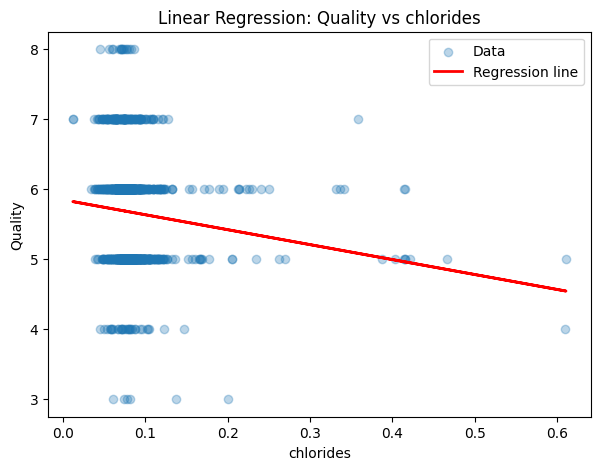

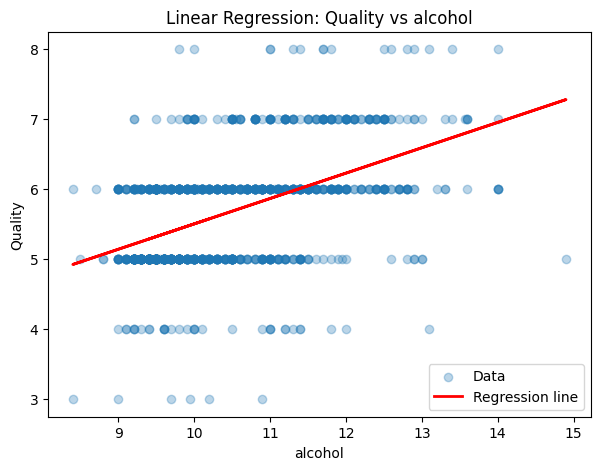

In [6]:
import matplotlib.pyplot as plt

def plot_regression(feature):
    X = df[[feature]].values
    y = df["quality"].values
    
    # Scale
    X_scaled = scaler.fit_transform(X)
    sgd_reg.fit(X_scaled, y)
    
    # Predictions
    y_pred = sgd_reg.predict(X_scaled)
    
    # Scatter + regression line
    plt.figure(figsize=(7,5))
    plt.scatter(X, y, alpha=0.3, label="Data")
    plt.plot(X, y_pred, color="red", linewidth=2, label="Regression line")
    plt.xlabel(feature)
    plt.ylabel("Quality")
    plt.title(f"Linear Regression: Quality vs {feature}")
    plt.legend()
    plt.show()

plot_regression("chlorides")
plot_regression("alcohol")


The regression line for chlorides shows a weak negative slope and does not fit the data well, as the points are widely scattered. In contrast, the regression line for alcohol shows a clear positive slope that aligns with the upward trend in the data. This indicates that alcohol is a much stronger predictor of wine quality than chlorides.